<a href="https://colab.research.google.com/github/qinyufm/deeplearning-models/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM


In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


## Get the data

In [3]:
df = web.DataReader('MRK', data_source='yahoo', start='2018-01-01', end='2020-02-11')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,81.120003,80.209999,81.120003,80.620003,1573700.0,77.166901
2018-01-03,80.980003,79.269997,80.599998,79.709999,2403200.0,76.295876
2018-01-04,80.790001,79.470001,79.739998,80.220001,2848200.0,76.784019
2018-01-05,80.910004,80.169998,80.699997,80.830002,2079900.0,77.367897
2018-01-08,81.970001,80.830002,80.900002,81.709999,1472100.0,78.210205
...,...,...,...,...,...,...
2020-02-05,84.639999,83.800003,84.040001,84.110001,2586500.0,84.110001
2020-02-06,82.150002,78.480003,81.000000,79.769997,7576700.0,79.769997
2020-02-07,81.269997,79.769997,79.769997,80.349998,3268900.0,80.349998


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


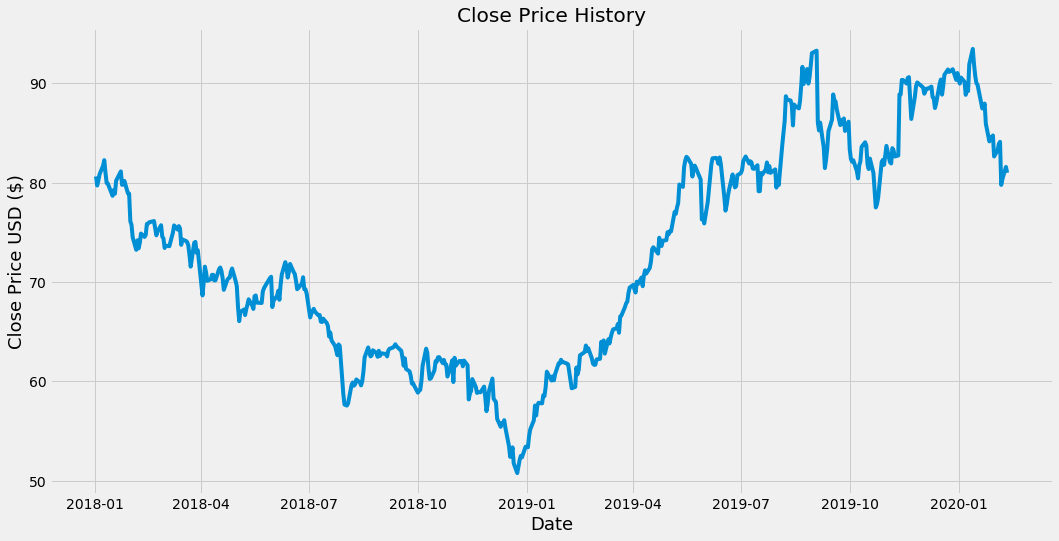

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## Filter the data by close

In [5]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

425

### Scale the data

In [0]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

### Prepare training

In [7]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    #print()

[array([0.69936791, 0.67806134, 0.69000238, 0.70428477, 0.72488878,
       0.7377664 , 0.70826506, 0.68391477, 0.68251   , 0.65371105,
       0.66729105, 0.65862791, 0.6893    , 0.70568953, 0.71130878,
       0.67970029, 0.68016866, 0.68883163, 0.65933047, 0.65886209,
       0.59377198, 0.58557721, 0.55584169, 0.52634053, 0.54881768,
       0.52985244, 0.54249587, 0.56473901, 0.55677826, 0.56146111,
       0.58745017, 0.58838674, 0.59143064, 0.59424017, 0.57714826,
       0.56052454, 0.56965587, 0.58440645, 0.55748064, 0.55326616,
       0.53078901, 0.53617425, 0.53500349, 0.54553977, 0.55677826,
       0.56708035, 0.58393826, 0.57410436, 0.5822993 , 0.57667988,
       0.53804739, 0.55069064, 0.54741273, 0.54483721, 0.53711082,
       0.5139311 , 0.48677128, 0.54296425, 0.54507139, 0.51931634])]
[0.5254039551025038]

[array([0.69936791, 0.67806134, 0.69000238, 0.70428477, 0.72488878,
       0.7377664 , 0.70826506, 0.68391477, 0.68251   , 0.65371105,
       0.66729105, 0.65862791, 0.689

#### convert to numpy array

In [9]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(365, 60, 1)

## Build the model

In [10]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

### Train the model

In [11]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





365/365 [==============================] - 30s 81ms/step - loss: 0.0060


### Prediction and RMSE

In [12]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.4977315451633246

### Visualization

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


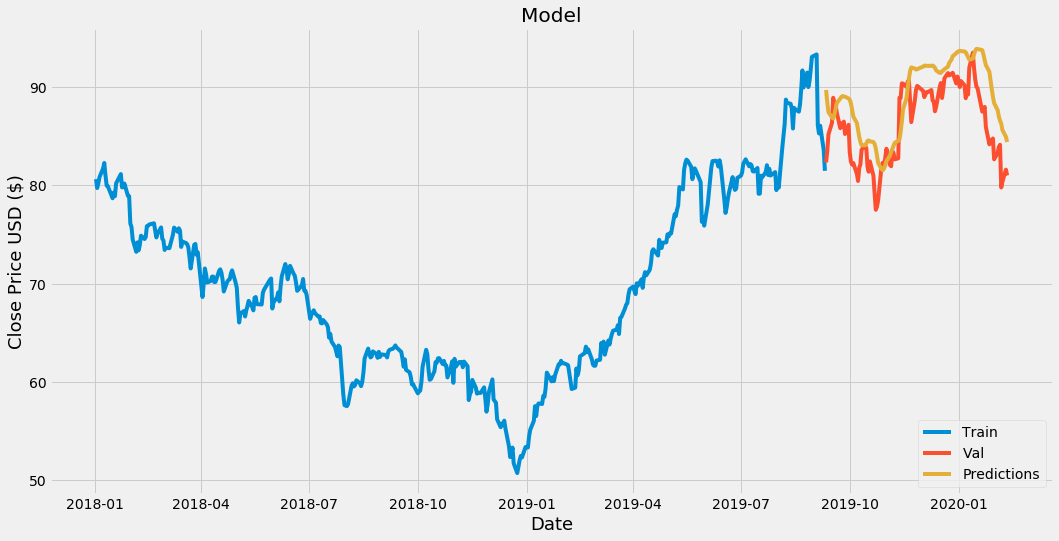

,Close,Predictions
Date,,
2019-09-11,82.320000,89.679794
2019-09-12,83.470001,88.400482
2019-09-13,85.169998,87.422745
2019-09-16,86.339996,86.888161
2019-09-17,88.879997,86.769600
...,...,...
2020-02-05,84.110001,86.547447
2020-02-06,79.769997,86.269768
2020-02-07,80.349998,85.612686


In [13]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#Show the valid and predicted prices
valid

In [14]:
#Get the quote
apple_quote = web.DataReader('TSN', data_source='yahoo', start='2018-01-01', end='2020-02-11')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

#Get the quote
apple_quote2 = web.DataReader('TSN', data_source='yahoo', start='2019-12-18', end='2020-02-11')
print(apple_quote2['Close'])

[[83.93123]]
Date
2019-12-18    88.860001
2019-12-19    89.739998
2019-12-20    90.860001
2019-12-23    91.389999
2019-12-24    91.150002
2019-12-26    91.300003
2019-12-27    91.419998
2019-12-30    90.339996
2019-12-31    91.040001
2020-01-02    89.970001
2020-01-03    90.580002
2020-01-06    90.150002
2020-01-07    88.839996
2020-01-08    89.389999
2020-01-09    89.209999
2020-01-10    91.919998
2020-01-13    93.459999
2020-01-14    91.940002
2020-01-15    90.790001
2020-01-16    90.019997
2020-01-17    89.860001
2020-01-21    87.470001
2020-01-22    87.610001
2020-01-23    87.959999
2020-01-24    85.930000
2020-01-27    84.150002
2020-01-28    84.570000
2020-01-29    84.410004
2020-01-30    84.750000
2020-01-31    82.629997
2020-02-03    83.269997
2020-02-04    83.889999
2020-02-05    84.110001
2020-02-06    79.769997
2020-02-07    80.349998
2020-02-10    81.580002
2020-02-11    80.989998
Name: Close, dtype: float64


# All together prediction

In [0]:
df = web.DataReader('MRK', data_source='yahoo', start='2018-01-01', end='2020-02-11')
